In [0]:
%tensorflow_version 1.x

In [2]:
%cd /content/drive/My Drive/HTF_detection

/content/drive/My Drive/HTF_detection


In [0]:
import numpy as np
from pandas import DataFrame

from tensorflow import keras
from tensorflow.keras.models import  Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
classes = ['Lumpy', 'Giggles', 'Cuddles']
num_classes = len(classes)
img_size = 224

In [0]:
X_train, X_test, y_train, y_test = np.load('htf_data.npy', allow_pickle=True)

In [0]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [8]:
model = VGG16(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))

top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(num_classes, activation='softmax'))

model = Model(inputs=model.input, outputs=top_model(model.output))

# model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
# 学習させる層の確認

for i, layer in enumerate(model.layers):
  print('{}----{}'.format(i, layer.name))


0----input_1
1----block1_conv1
2----block1_conv2
3----block1_pool
4----block2_conv1
5----block2_conv2
6----block2_pool
7----block3_conv1
8----block3_conv2
9----block3_conv3
10----block3_pool
11----block4_conv1
12----block4_conv2
13----block4_conv3
14----block4_pool
15----block5_conv1
16----block5_conv2
17----block5_conv3
18----block5_pool
19----sequential


In [0]:
for layer in model.layers[:15]:
  layer.trainable = False

In [0]:
opt = Adam(learning_rate=0.001)
# es = EarlyStopping(monitor='val_loss', patience=50, verbose=0, mode='auto')

path = 'htf_model.h5'
cp = ModelCheckpoint(path, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [0]:
bs = 128
ep = 60

history = model.fit(X_train,
                    y_train,
                    batch_size=bs,
                    epochs=ep,
                    verbose=0,
                    validation_data=(X_test, y_test),
                    callbacks=[cp],
                    )

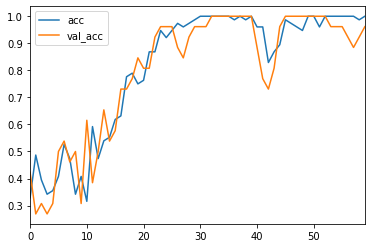

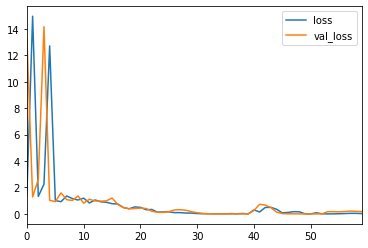

In [14]:
DataFrame({'acc': history.history['acc'], 
           'val_acc': history.history['val_acc']}).plot()
DataFrame({'loss': history.history['loss'], 
           'val_loss': history.history['val_loss']}).plot()